In [18]:
from __future__ import print_function

"""
A script to run cqed_rhf method on the formaldehyde molecule in a cc-pVDZ basis set.
"""

__authors__   = ["Jon McTague", "Jonathan Foley"]
__credits__   = ["Jon McTague", "Jonathan Foley"]

__copyright_amp__ = "(c) 2014-2018, The Psi4NumPy Developers"
__license__   = "BSD-3-Clause"
__date__      = "2021-01-15"

# ==> Import Psi4, NumPy, & SciPy <==
import psi4
import numpy as np
from helper_cqed_rhf import *
from helper_cs_cqed_cis import *
from matplotlib import pyplot as plt

# Set Psi4 & NumPy Memory Options
psi4.set_memory('2 GB')
psi4.core.set_output_file('output.dat', False)

numpy_memory = 2


In [19]:

# rhf/cc-pVDZ optimized geometry of formaldehyde
molstr = """

0 1
O 0.0000000000 0.0000000000 5.91268220e-01
C 0.0000000000 0.0000000000 -5.90400099e-01
H 0.0000000000 9.32184336e-01 -1.17703144e+00
H 0.0000000000 -9.32184336e-01 -1.17703144e+00
no_reorient
symmetry c1
"""

# options dict
options_dict = {'basis': 'cc-pVDZ',
               'save_jk': True, 
               'scf_type': 'pk',
               'e_convergence' : 1e-8,
               'd_convergence' : 1e-7}

# to verify this geometry is optimal, you can run the block below
#psi4.set_options(options_dict)
#mol = psi4.geometry(molstr)

#opt_geometry = mol.geometry()
#print(opt_geometry.np*0.529)

Run the scan below to generate data for Figure 1: (Top)  Total  CQED-RHF  energy,  (middle)  canonical  RHFcontribution to the total energy, (bottom) Pauli-Fierz contribution tothe total energy as a function of|λ|along they−and/orz−axes

In [3]:
# different magnitudes of the lambda vector
l_mag = np.array([0., 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2])

# array to hold the different cqed_rhf energies
cqed_rhf_energy_array = np.zeros((24,len(l_mag)))


# loop over the different lambda magnitudes and compute different contributions
# to the CQED-RHF energy
ctr = 0
for l in l_mag:
    # same magnitude, different polarizations
    lam_y = np.array([0, l, 0])
    lam_z = np.array([0, 0, l])
    lam_yz = np.array([0, l/np.sqrt(2), l/np.sqrt(2)])
    
    # results for y-polarized
    cqed_dict = cqed_rhf(lam_y, molstr, options_dict)
    
    # get cqed-rhf energies
    cqed_rhf_energy_array[0,ctr] = cqed_dict['CQED-RHF ENERGY']
    cqed_rhf_energy_array[1,ctr] = cqed_dict['1E ENERGY']
    cqed_rhf_energy_array[2,ctr] = cqed_dict['2E ENERGY']
    cqed_rhf_energy_array[3,ctr] = cqed_dict['1E DIPOLE ENERGY']
    cqed_rhf_energy_array[4,ctr] = cqed_dict['1E QUADRUPOLE ENERGY']
    cqed_rhf_energy_array[5,ctr] = cqed_dict['2E DIPOLE ENERGY']
    cqed_rhf_energy_array[6,ctr] = cqed_dict['DIPOLE ENERGY']
    cqed_rhf_energy_array[7,ctr] = cqed_dict['NUCLEAR REPULSION ENERGY']
    
    if ctr>0:
        # if |lam| > 0, compute z- and y- and z- polarized results
        cqed_dict = cqed_rhf(lam_z, molstr, options_dict)
        cqed_rhf_energy_array[8,ctr] = cqed_dict['CQED-RHF ENERGY']
        cqed_rhf_energy_array[9,ctr] = cqed_dict['1E ENERGY']
        cqed_rhf_energy_array[10,ctr] = cqed_dict['2E ENERGY']
        cqed_rhf_energy_array[11,ctr] = cqed_dict['1E DIPOLE ENERGY']
        cqed_rhf_energy_array[12,ctr] = cqed_dict['1E QUADRUPOLE ENERGY']
        cqed_rhf_energy_array[13,ctr] = cqed_dict['2E DIPOLE ENERGY']
        cqed_rhf_energy_array[14,ctr] = cqed_dict['DIPOLE ENERGY']
        cqed_rhf_energy_array[15,ctr] = cqed_dict['NUCLEAR REPULSION ENERGY']
        cqed_dict = cqed_rhf(lam_yz, molstr, options_dict)
        cqed_rhf_energy_array[16,ctr] = cqed_dict['CQED-RHF ENERGY']
        cqed_rhf_energy_array[17,ctr] = cqed_dict['1E ENERGY']
        cqed_rhf_energy_array[18,ctr] = cqed_dict['2E ENERGY']
        cqed_rhf_energy_array[19,ctr] = cqed_dict['1E DIPOLE ENERGY']
        cqed_rhf_energy_array[20,ctr] = cqed_dict['1E QUADRUPOLE ENERGY']
        cqed_rhf_energy_array[21,ctr] = cqed_dict['2E DIPOLE ENERGY']
        cqed_rhf_energy_array[22,ctr] = cqed_dict['DIPOLE ENERGY']
        cqed_rhf_energy_array[23,ctr] = cqed_dict['NUCLEAR REPULSION ENERGY']
    
    ctr+=1
    



Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2835960115897649
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.8772221766176642   dE = -1.13877E+02   dRMS = 1.33660E-08
SCF Iteration   2: Energy = -113.8772221766176926   dE = -2.84217E-14   dRMS = 5.01791E-09
Total time for SCF iterations: 0.022 seconds 

QED-RHF   energy: -113.87722218 hartree
Psi4  SCF energy: -113.87722218 hartree

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2806574171740124
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.8758129861421082   dE = -1.13876E+02   dRMS = 2.04033E-05
SCF Iteration   2: Energy = -113.8758136253486839   dE = -6.39207E-07   dRMS = 7.68672E-06
SCF Ite

SCF Iteration  17: Energy = -113.8715966326658702   dE = -4.60716E-11   dRMS = 3.73311E-07
SCF Iteration  18: Energy = -113.8715966326937234   dE = -2.78533E-11   dRMS = 2.90808E-07
SCF Iteration  19: Energy = -113.8715966327110607   dE = -1.73372E-11   dRMS = 2.26896E-07
SCF Iteration  20: Energy = -113.8715966327213209   dE = -1.02602E-11   dRMS = 1.76828E-07
SCF Iteration  21: Energy = -113.8715966327276874   dE = -6.36646E-12   dRMS = 1.37923E-07
SCF Iteration  22: Energy = -113.8715966327312685   dE = -3.58114E-12   dRMS = 1.07513E-07
SCF Iteration  23: Energy = -113.8715966327337128   dE = -2.44427E-12   dRMS = 8.38441E-08
Total time for SCF iterations: 0.276 seconds 

QED-RHF   energy: -113.87159663 hartree
Psi4  SCF energy: -113.87722218 hartree

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2571570845122153
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.00


Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2241084256651220
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0025672239524630
SCF Iteration   1: Energy = -113.8621212338832720   dE = -1.13862E+02   dRMS = 1.95383E-04
SCF Iteration   2: Energy = -113.8621720116036329   dE = -5.07777E-05   dRMS = 9.86543E-05
SCF Iteration   3: Energy = -113.8621767490735266   dE = -4.73747E-06   dRMS = 5.36870E-05
SCF Iteration   4: Energy = -113.8621777404751469   dE = -9.91402E-07   dRMS = 4.46907E-05
SCF Iteration   5: Energy = -113.8621781627367255   dE = -4.22262E-07   dRMS = 3.24438E-05
SCF Iteration   6: Energy = -113.8621783957426601   dE = -2.33006E-07   dRMS = 2.59319E-05
SCF Iteration   7: Energy = -113.8621785321399784   dE = -1.36397E-07   dRMS = 1.96213E-05
SCF Iteration   8: Energy = -113.8621786131969884   dE = -8.10570E-08   dRMS = 1.54034E-05
SCF Iteration   9: En


Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.1778403032791687
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0045639536932676
SCF Iteration   1: Energy = -113.8503760562010427   dE = -1.13850E+02   dRMS = 3.47348E-04
SCF Iteration   2: Energy = -113.8505345311492931   dE = -1.58475E-04   dRMS = 1.74161E-04
SCF Iteration   3: Energy = -113.8505491783191985   dE = -1.46472E-05   dRMS = 9.42573E-05
SCF Iteration   4: Energy = -113.8505522862112969   dE = -3.10789E-06   dRMS = 7.81840E-05
SCF Iteration   5: Energy = -113.8505536062436079   dE = -1.32003E-06   dRMS = 5.61610E-05
SCF Iteration   6: Energy = -113.8505543245953930   dE = -7.18352E-07   dRMS = 4.47276E-05
SCF Iteration   7: Energy = -113.8505547384245773   dE = -4.13829E-07   dRMS = 3.35067E-05
SCF Iteration   8: Energy = -113.8505549806445458   dE = -2.42220E-07   dRMS = 2.61828E-05
SCF Iteration   9: En


Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.1183527173541279
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0071311776457306
SCF Iteration   1: Energy = -113.8352751134668779   dE = -1.13835E+02   dRMS = 5.42730E-04
SCF Iteration   2: Energy = -113.8356559777770514   dE = -3.80864E-04   dRMS = 2.69843E-04
SCF Iteration   3: Energy = -113.8356908652859119   dE = -3.48875E-05   dRMS = 1.44992E-04
SCF Iteration   4: Energy = -113.8356984062568529   dE = -7.54097E-06   dRMS = 1.19741E-04
SCF Iteration   5: Energy = -113.8357015905552601   dE = -3.18430E-06   dRMS = 8.48331E-05
SCF Iteration   6: Energy = -113.8357032910563476   dE = -1.70050E-06   dRMS = 6.72764E-05
SCF Iteration   7: Energy = -113.8357042505246426   dE = -9.59468E-07   dRMS = 4.97484E-05
SCF Iteration   8: Energy = -113.8357048012198334   dE = -5.50695E-07   dRMS = 3.86598E-05
SCF Iteration   9: En


Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.0456456678908808
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0102688958098520
SCF Iteration   1: Energy = -113.8168184056803085   dE = -1.13817E+02   dRMS = 7.81531E-04
SCF Iteration   2: Energy = -113.8175936466222424   dE = -7.75241E-04   dRMS = 3.84906E-04
SCF Iteration   3: Energy = -113.8176641873124026   dE = -7.05407E-05   dRMS = 2.04966E-04
SCF Iteration   4: Energy = -113.8176797901587207   dE = -1.56028E-05   dRMS = 1.68409E-04
SCF Iteration   5: Energy = -113.8176863149210050   dE = -6.52476E-06   dRMS = 1.17285E-04
SCF Iteration   6: Energy = -113.8176897163022119   dE = -3.40138E-06   dRMS = 9.25817E-05
SCF Iteration   7: Energy = -113.8176915868946679   dE = -1.87059E-06   dRMS = 6.73651E-05
SCF Iteration   8: Energy = -113.8176926350200091   dE = -1.04813E-06   dRMS = 5.20282E-05
SCF Iteration   9: En


Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -217.9597191548881767
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0139771081856319
SCF Iteration   1: Energy = -113.7950059328420025   dE = -1.13795E+02   dRMS = 1.06375E-03
SCF Iteration   2: Energy = -113.7964122581996946   dE = -1.40633E-03   dRMS = 5.18609E-04
SCF Iteration   3: Energy = -113.7965398905625705   dE = -1.27632E-04   dRMS = 2.73182E-04
SCF Iteration   4: Energy = -113.7965688905506028   dE = -2.90000E-05   dRMS = 2.23184E-04
SCF Iteration   5: Energy = -113.7965808498769320   dE = -1.19593E-05   dRMS = 1.52261E-04
SCF Iteration   6: Energy = -113.7965869039695690   dE = -6.05409E-06   dRMS = 1.19620E-04
SCF Iteration   7: Energy = -113.7965901335812191   dE = -3.22961E-06   dRMS = 8.53585E-05
SCF Iteration   8: Energy = -113.7965918921908752   dE = -1.75861E-06   dRMS = 6.55029E-05
SCF Iteration   9: En


Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -217.8605731783468968
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0182558147730703
SCF Iteration   1: Energy = -113.7698376949515620   dE = -1.13770E+02   dRMS = 1.38939E-03
SCF Iteration   2: Energy = -113.7721818775781060   dE = -2.34418E-03   dRMS = 6.70336E-04
SCF Iteration   3: Energy = -113.7723952511430099   dE = -2.13374E-04   dRMS = 3.48629E-04
SCF Iteration   4: Energy = -113.7724451889046833   dE = -4.99378E-05   dRMS = 2.83068E-04
SCF Iteration   5: Energy = -113.7724654209555837   dE = -2.02321E-05   dRMS = 1.88498E-04
SCF Iteration   6: Energy = -113.7724753188229556   dE = -9.89787E-06   dRMS = 1.47412E-04
SCF Iteration   7: Energy = -113.7724804167392989   dE = -5.09792E-06   dRMS = 1.02782E-04
SCF Iteration   8: Energy = -113.7724831021137675   dE = -2.68537E-06   dRMS = 7.83829E-05
SCF Iteration   9: En


Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -217.7482077382670127
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0231050155721671
SCF Iteration   1: Energy = -113.7413136920087737   dE = -1.13741E+02   dRMS = 1.75844E-03
SCF Iteration   2: Energy = -113.7449761309045329   dE = -3.66244E-03   dRMS = 8.39650E-04
SCF Iteration   3: Energy = -113.7453126516179225   dE = -3.36521E-04   dRMS = 4.30334E-04
SCF Iteration   4: Energy = -113.7453938867018195   dE = -8.12351E-05   dRMS = 3.47125E-04
SCF Iteration   5: Energy = -113.7454261339155437   dE = -3.22472E-05   dRMS = 2.24796E-04
SCF Iteration   6: Energy = -113.7454413201903236   dE = -1.51863E-05   dRMS = 1.75081E-04
SCF Iteration   7: Energy = -113.7454488397935251   dE = -7.51960E-06   dRMS = 1.18798E-04
SCF Iteration   8: Energy = -113.7454526541794024   dE = -3.81439E-06   dRMS = 9.00982E-05
SCF Iteration   9: En


Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -217.6226228346480411
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0285247105829223
SCF Iteration   1: Energy = -113.7094339240142062   dE = -1.13709E+02   dRMS = 2.17092E-03
SCF Iteration   2: Energy = -113.7148707941348960   dE = -5.43687E-03   dRMS = 1.02633E-03
SCF Iteration   3: Energy = -113.7153785543426494   dE = -5.07760E-04   dRMS = 5.17417E-04
SCF Iteration   4: Energy = -113.7155049860517977   dE = -1.26432E-04   dRMS = 4.14525E-04
SCF Iteration   5: Energy = -113.7155541076252376   dE = -4.91216E-05   dRMS = 2.60091E-04
SCF Iteration   6: Energy = -113.7155763202568437   dE = -2.22126E-05   dRMS = 2.01903E-04
SCF Iteration   7: Energy = -113.7155868574577653   dE = -1.05372E-05   dRMS = 1.32719E-04
SCF Iteration   8: Energy = -113.7155919828372390   dE = -5.12538E-06   dRMS = 1.00240E-04
SCF Iteration   9: En

In [30]:
# different magnitudes of the lambda vector
l_mag = np.array([0., 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2])


x_mag_eps = np.zeros((12,len(l_mag)))
z_mag_eps = np.zeros((12,len(l_mag)))
y_mag_eps = np.zeros((12,len(l_mag)))
yz_mag_eps = np.zeros((12,len(l_mag)))


# loop over the different lambda magnitudes and compute different contributions
# to the CQED-RHF energy
ctr = 0
for l in l_mag:
    # same magnitude, different polarizations
    lam_x = np.array([l, 0, 0])
    lam_y = np.array([0, l, 0])
    lam_z = np.array([0, 0, l])
    lam_yz = np.array([0, l/np.sqrt(2), l/np.sqrt(2)])

    cqed_dict = cqed_rhf(lam_x, molstr, options_dict)
    x_mag_eps[:,ctr] = cqed_dict["CQED-RHF EPS"][:12]
    # results for y-polarized
    cqed_dict = cqed_rhf(lam_y, molstr, options_dict)
    y_mag_eps[:,ctr] = cqed_dict["CQED-RHF EPS"][:12]
    cqed_dict = cqed_rhf(lam_z, molstr, options_dict)
    z_mag_eps[:,ctr] = cqed_dict["CQED-RHF EPS"][:12]
    cqed_dict = cqed_rhf(lam_yz, molstr, options_dict)
    yz_mag_eps[:,ctr] = cqed_dict["CQED-RHF EPS"][:12]
    ctr += 1
    
    



C
38
Cocc
38

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2835960115897649
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.8772221766176642   dE = -1.13877E+02   dRMS = 1.33660E-08
SCF Iteration   2: Energy = -113.8772221766176926   dE = -2.84217E-14   dRMS = 5.01791E-09
Total time for SCF iterations: 0.024 seconds 

QED-RHF   energy: -113.87722218 hartree
Psi4  SCF energy: -113.87722218 hartree
C
38
Cocc
38

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2835960115897649
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.8772221766176642   dE = -1.13877E+02   dRMS = 1.33660E-08
SCF Iteration   2: Energy = -113.8772221766176926   dE = -2.84217E-14   

C
38
Cocc
38

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2788218484967331
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0001426235529146
SCF Iteration   1: Energy = -113.8756786401168455   dE = -1.13876E+02   dRMS = 2.16866E-05
SCF Iteration   2: Energy = -113.8756793556291171   dE = -7.15512E-07   dRMS = 9.26510E-06
SCF Iteration   3: Energy = -113.8756794201577378   dE = -6.45286E-08   dRMS = 4.79968E-06
SCF Iteration   4: Energy = -113.8756794308512923   dE = -1.06936E-08   dRMS = 3.76172E-06
SCF Iteration   5: Energy = -113.8756794343191672   dE = -3.46787E-09   dRMS = 2.81215E-06
SCF Iteration   6: Energy = -113.8756794360392490   dE = -1.72008E-09   dRMS = 2.20955E-06
SCF Iteration   7: Energy = -113.8756794370296888   dE = -9.90440E-10   dRMS = 1.71518E-06
SCF Iteration   8: Energy = -113.8756794376240151   dE = -5.94326E-10   dRMS = 1.33987E-06
SCF Iter

SCF Iteration  17: Energy = -113.8705221193471999   dE = -1.79710E-10   dRMS = 7.31625E-07
SCF Iteration  18: Energy = -113.8705221194557282   dE = -1.08528E-10   dRMS = 5.69225E-07
SCF Iteration  19: Energy = -113.8705221195212545   dE = -6.55263E-11   dRMS = 4.42530E-07
SCF Iteration  20: Energy = -113.8705221195608317   dE = -3.95772E-11   dRMS = 3.44228E-07
SCF Iteration  21: Energy = -113.8705221195849617   dE = -2.41300E-11   dRMS = 2.67653E-07
SCF Iteration  22: Energy = -113.8705221195992863   dE = -1.43245E-11   dRMS = 2.08174E-07
SCF Iteration  23: Energy = -113.8705221196081965   dE = -8.91021E-12   dRMS = 1.61878E-07
SCF Iteration  24: Energy = -113.8705221196133408   dE = -5.14433E-12   dRMS = 1.25897E-07
SCF Iteration  25: Energy = -113.8705221196168651   dE = -3.52429E-12   dRMS = 9.79028E-08
Total time for SCF iterations: 0.292 seconds 

QED-RHF   energy: -113.87052212 hartree
Psi4  SCF energy: -113.87722218 hartree
C
38
Cocc
38

Start SCF iterations:

Canonical RHF One

C
38
Cocc
38

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2241084256651220
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0025672239524630
SCF Iteration   1: Energy = -113.8621212338832720   dE = -1.13862E+02   dRMS = 1.95383E-04
SCF Iteration   2: Energy = -113.8621720116036329   dE = -5.07777E-05   dRMS = 9.86543E-05
SCF Iteration   3: Energy = -113.8621767490735266   dE = -4.73747E-06   dRMS = 5.36870E-05
SCF Iteration   4: Energy = -113.8621777404751469   dE = -9.91402E-07   dRMS = 4.46907E-05
SCF Iteration   5: Energy = -113.8621781627367255   dE = -4.22262E-07   dRMS = 3.24438E-05
SCF Iteration   6: Energy = -113.8621783957426601   dE = -2.33006E-07   dRMS = 2.59319E-05
SCF Iteration   7: Energy = -113.8621785321399784   dE = -1.36397E-07   dRMS = 1.96213E-05
SCF Iteration   8: Energy = -113.8621786131969884   dE = -8.10570E-08   dRMS = 1.54034E-05
SCF Iter

C
38
Cocc
38

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2365785009341721
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.8546751290089389   dE = -1.13855E+02   dRMS = 3.26498E-04
SCF Iteration   2: Energy = -113.8548326947737053   dE = -1.57566E-04   dRMS = 1.19386E-04
SCF Iteration   3: Energy = -113.8548454409510384   dE = -1.27462E-05   dRMS = 5.54341E-05
SCF Iteration   4: Energy = -113.8548471865483691   dE = -1.74560E-06   dRMS = 3.87305E-05
SCF Iteration   5: Energy = -113.8548476431475081   dE = -4.56599E-07   dRMS = 2.97653E-05
SCF Iteration   6: Energy = -113.8548478435693028   dE = -2.00422E-07   dRMS = 2.23424E-05
SCF Iteration   7: Energy = -113.8548479529217445   dE = -1.09352E-07   dRMS = 1.77166E-05
SCF Iteration   8: Energy = -113.8548480167385719   dE = -6.38168E-08   dRMS = 1.34910E-05
SCF Iter

C
38
Cocc
38

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2410759830978293
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.8450001662752982   dE = -1.13845E+02   dRMS = 3.89926E-04
SCF Iteration   2: Energy = -113.8451607602057152   dE = -1.60594E-04   dRMS = 1.43360E-04
SCF Iteration   3: Energy = -113.8451727387354424   dE = -1.19785E-05   dRMS = 6.46744E-05
SCF Iteration   4: Energy = -113.8451750048818099   dE = -2.26615E-06   dRMS = 5.49317E-05
SCF Iteration   5: Energy = -113.8451758114545385   dE = -8.06573E-07   dRMS = 3.70369E-05
SCF Iteration   6: Energy = -113.8451761963270883   dE = -3.84873E-07   dRMS = 3.13052E-05
SCF Iteration   7: Energy = -113.8451764034186056   dE = -2.07092E-07   dRMS = 2.28627E-05
SCF Iteration   8: Energy = -113.8451765215547198   dE = -1.18136E-07   dRMS = 1.86417E-05
SCF Iter

C
38
Cocc
38

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.1642419342722974
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0035655888228652
SCF Iteration   1: Energy = -113.8386337640979917   dE = -1.13839E+02   dRMS = 5.42190E-04
SCF Iteration   2: Energy = -113.8390449777723177   dE = -4.11214E-04   dRMS = 2.23355E-04
SCF Iteration   3: Energy = -113.8390792592994956   dE = -3.42815E-05   dRMS = 1.15465E-04
SCF Iteration   4: Energy = -113.8390851913485591   dE = -5.93205E-06   dRMS = 8.97799E-05
SCF Iteration   5: Energy = -113.8390871942006868   dE = -2.00285E-06   dRMS = 6.55618E-05
SCF Iteration   6: Energy = -113.8390881803462094   dE = -9.86146E-07   dRMS = 5.11584E-05
SCF Iteration   7: Energy = -113.8390887320937992   dE = -5.51748E-07   dRMS = 3.87995E-05
SCF Iteration   8: Energy = -113.8390890528561812   dE = -3.20762E-07   dRMS = 3.00178E-05
SCF Iter

C
38
Cocc
38

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.0456456678908808
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0102688958098520
SCF Iteration   1: Energy = -113.8168184056803085   dE = -1.13817E+02   dRMS = 7.81531E-04
SCF Iteration   2: Energy = -113.8175936466222424   dE = -7.75241E-04   dRMS = 3.84906E-04
SCF Iteration   3: Energy = -113.8176641873124026   dE = -7.05407E-05   dRMS = 2.04966E-04
SCF Iteration   4: Energy = -113.8176797901587207   dE = -1.56028E-05   dRMS = 1.68409E-04
SCF Iteration   5: Energy = -113.8176863149210050   dE = -6.52476E-06   dRMS = 1.17285E-04
SCF Iteration   6: Energy = -113.8176897163022119   dE = -3.40138E-06   dRMS = 9.25817E-05
SCF Iteration   7: Energy = -113.8176915868946679   dE = -1.87059E-06   dRMS = 6.73651E-05
SCF Iteration   8: Energy = -113.8176926350200091   dE = -1.04813E-06   dRMS = 5.20282E-05
SCF Iter

C
38
Cocc
38

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.1396048852069782
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.8081718433161882   dE = -1.13808E+02   dRMS = 9.99907E-04
SCF Iteration   2: Energy = -113.8095388896251734   dE = -1.36705E-03   dRMS = 3.46307E-04
SCF Iteration   3: Energy = -113.8096335601262297   dE = -9.46705E-05   dRMS = 1.62299E-04
SCF Iteration   4: Energy = -113.8096463291332441   dE = -1.27690E-05   dRMS = 1.13810E-04
SCF Iteration   5: Energy = -113.8096499385088123   dE = -3.60938E-06   dRMS = 8.67812E-05
SCF Iteration   6: Energy = -113.8096516167473453   dE = -1.67824E-06   dRMS = 6.48923E-05
SCF Iteration   7: Energy = -113.8096525428569237   dE = -9.26110E-07   dRMS = 5.07412E-05
SCF Iteration   8: Energy = -113.8096530789895837   dE = -5.36133E-07   dRMS = 3.83825E-05
SCF Iter

C
38
Cocc
38

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.1747447386505314
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.7947338301418370   dE = -1.13795E+02   dRMS = 9.98208E-04
SCF Iteration   2: Energy = -113.7957607577668568   dE = -1.02693E-03   dRMS = 3.57475E-04
SCF Iteration   3: Energy = -113.7958344231899162   dE = -7.36654E-05   dRMS = 1.61018E-04
SCF Iteration   4: Energy = -113.7958482664660096   dE = -1.38433E-05   dRMS = 1.36526E-04
SCF Iteration   5: Energy = -113.7958532217625134   dE = -4.95530E-06   dRMS = 9.20122E-05
SCF Iteration   6: Energy = -113.7958555954025428   dE = -2.37364E-06   dRMS = 7.77460E-05
SCF Iteration   7: Energy = -113.7958568723639132   dE = -1.27696E-06   dRMS = 5.67170E-05
SCF Iteration   8: Energy = -113.7958576004438953   dE = -7.28080E-07   dRMS = 4.62306E-05
SCF Iter

SCF Iteration  16: Energy = -113.7724861495386506   dE = -1.83494E-08   dRMS = 6.49835E-06
SCF Iteration  17: Energy = -113.7724861594187615   dE = -9.88011E-09   dRMS = 4.74626E-06
SCF Iteration  18: Energy = -113.7724861647398882   dE = -5.32113E-09   dRMS = 3.49692E-06
SCF Iteration  19: Energy = -113.7724861676057770   dE = -2.86589E-09   dRMS = 2.55864E-06
SCF Iteration  20: Energy = -113.7724861691493743   dE = -1.54360E-09   dRMS = 1.88248E-06
SCF Iteration  21: Energy = -113.7724861699808798   dE = -8.31506E-10   dRMS = 1.37894E-06
SCF Iteration  22: Energy = -113.7724861704284365   dE = -4.47557E-10   dRMS = 1.01363E-06
SCF Iteration  23: Energy = -113.7724861706699642   dE = -2.41528E-10   dRMS = 7.43023E-07
SCF Iteration  24: Energy = -113.7724861707995387   dE = -1.29575E-10   dRMS = 5.45870E-07
SCF Iteration  25: Energy = -113.7724861708697972   dE = -7.02585E-11   dRMS = 4.00322E-07
SCF Iteration  26: Energy = -113.7724861709074418   dE = -3.76446E-11   dRMS = 2.93995E-07

SCF Iteration  18: Energy = -113.7668335210522059   dE = -5.73124E-09   dRMS = 3.94079E-06
SCF Iteration  19: Energy = -113.7668335243778586   dE = -3.32565E-09   dRMS = 3.00336E-06
SCF Iteration  20: Energy = -113.7668335263077779   dE = -1.92992E-09   dRMS = 2.28711E-06
SCF Iteration  21: Energy = -113.7668335274275933   dE = -1.11982E-09   dRMS = 1.74269E-06
SCF Iteration  22: Energy = -113.7668335280775693   dE = -6.49976E-10   dRMS = 1.32729E-06
SCF Iteration  23: Energy = -113.7668335284547823   dE = -3.77213E-10   dRMS = 1.01123E-06
SCF Iteration  24: Energy = -113.7668335286737715   dE = -2.18989E-10   dRMS = 7.70254E-07
SCF Iteration  25: Energy = -113.7668335288006176   dE = -1.26846E-10   dRMS = 5.86801E-07
SCF Iteration  26: Energy = -113.7668335288742867   dE = -7.36691E-11   dRMS = 4.46986E-07
SCF Iteration  27: Energy = -113.7668335289170045   dE = -4.27178E-11   dRMS = 3.40515E-07
SCF Iteration  28: Energy = -113.7668335289419019   dE = -2.48974E-11   dRMS = 2.59388E-07

SCF Iteration  16: Energy = -113.7510128461540830   dE = -2.88951E-08   dRMS = 9.36857E-06
SCF Iteration  17: Energy = -113.7510128636961895   dE = -1.75421E-08   dRMS = 7.28190E-06
SCF Iteration  18: Energy = -113.7510128743506073   dE = -1.06544E-08   dRMS = 5.68581E-06
SCF Iteration  19: Energy = -113.7510128808202694   dE = -6.46966E-09   dRMS = 4.42490E-06
SCF Iteration  20: Energy = -113.7510128847497981   dE = -3.92953E-09   dRMS = 3.45192E-06
SCF Iteration  21: Energy = -113.7510128871361985   dE = -2.38640E-09   dRMS = 2.68818E-06
SCF Iteration  22: Energy = -113.7510128885856773   dE = -1.44948E-09   dRMS = 2.09608E-06
SCF Iteration  23: Energy = -113.7510128894660966   dE = -8.80419E-10   dRMS = 1.63288E-06
SCF Iteration  24: Energy = -113.7510128900004247   dE = -5.34328E-10   dRMS = 1.27290E-06
SCF Iteration  25: Energy = -113.7510128903251712   dE = -3.24746E-10   dRMS = 9.91797E-07
SCF Iteration  26: Energy = -113.7510128905225599   dE = -1.97389E-10   dRMS = 7.73045E-07

C
38
Cocc
38

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -217.8061797023199517
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0142623552914608
SCF Iteration   1: Energy = -113.7228685265388890   dE = -1.13723E+02   dRMS = 2.16876E-03
SCF Iteration   2: Energy = -113.7282528226886029   dE = -5.38430E-03   dRMS = 8.46355E-04
SCF Iteration   3: Energy = -113.7286889667398952   dE = -4.36144E-04   dRMS = 4.27413E-04
SCF Iteration   4: Energy = -113.7287812472092270   dE = -9.22805E-05   dRMS = 3.23116E-04
SCF Iteration   5: Energy = -113.7288131295114795   dE = -3.18823E-05   dRMS = 2.18596E-04
SCF Iteration   6: Energy = -113.7288271434337474   dE = -1.40139E-05   dRMS = 1.67273E-04
SCF Iteration   7: Energy = -113.7288339957242300   dE = -6.85229E-06   dRMS = 1.18511E-04
SCF Iteration   8: Energy = -113.7288375348207268   dE = -3.53910E-06   dRMS = 8.95995E-05
SCF Iter

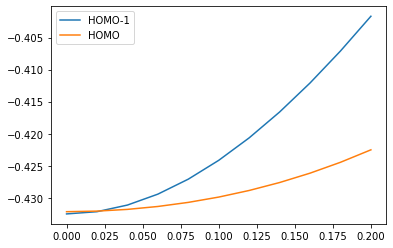

[[-20.57446801 -20.57406749 -20.57288616 -20.57094757 -20.56827003
  -20.5648924  -20.56088142 -20.55624694 -20.55106085 -20.54533684
  -20.53911394]
 [-11.34105477 -11.34079329 -11.34001091 -11.33872561 -11.33697059
  -11.33478055 -11.3321842  -11.32922957 -11.32593993 -11.32235408
  -11.3184969 ]
 [ -1.41949721  -1.41932532  -1.41881944  -1.41799854  -1.41688679
   -1.415518    -1.41393508  -1.41216574  -1.41025228  -1.40821928
   -1.40609525]
 [ -0.86260314  -0.86266545  -0.86285698  -0.86319229  -0.86369362
   -0.86438647  -0.86529581  -0.86644694  -0.86785852  -0.8695472
   -0.87152375]
 [ -0.69345808  -0.69334724  -0.69302088  -0.69249539  -0.69179534
   -0.69095198  -0.69000073  -0.68897658  -0.68791592  -0.68685247
   -0.68581904]
 [ -0.65299442  -0.65272492  -0.65192445  -0.65060775  -0.64879257
   -0.64650437  -0.64377654  -0.64062735  -0.63708946  -0.63317875
   -0.62891578]
 [ -0.53953067  -0.53922995  -0.53833612  -0.53686695  -0.53484627
   -0.53230592  -0.52928438  -0.52

In [39]:
# plots of different energy components vs different polzrizations and magnitudes
plt.plot(l_mag, yz_mag_eps[6,:]+0.107, label="HOMO-1" )
plt.plot(l_mag, yz_mag_eps[7,:], label="HOMO" )
#plt.plot(l_mag, yz_mag_eps[8,:]/yz_mag_eps[8,0], label="LUMO" )
#plt.plot(l_mag, yz_mag_eps[9,:]/yz_mag_eps[9,0], label="LUMO+1" )
plt.legend()
plt.show()
print(y_mag_eps)

In [4]:
# we didn't fill in the results for the |lam| = 0 results for the z- and y-, z-polarized
# but they are the same as the y-polarized case when the magnitude is zero
cqed_rhf_energy_array[0:8,0]
cqed_rhf_energy_array[8:16,0] = cqed_rhf_energy_array[0:8,0]
cqed_rhf_energy_array[16:24,0] = cqed_rhf_energy_array[0:8,0]

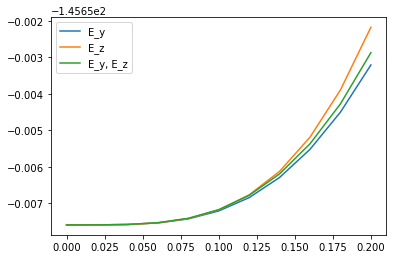

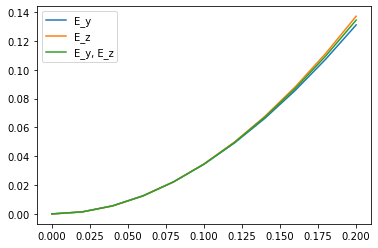

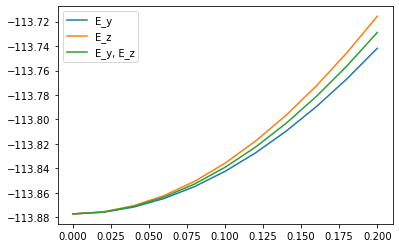

In [5]:
# plots of different energy components vs different polzrizations and magnitudes
plt.plot(l_mag, cqed_rhf_energy_array[1,:]+cqed_rhf_energy_array[2,:], label="E_y" )
plt.plot(l_mag, cqed_rhf_energy_array[9,:]+cqed_rhf_energy_array[10,:], label="E_z" )
plt.plot(l_mag, cqed_rhf_energy_array[17,:]+cqed_rhf_energy_array[18,:], label="E_y, E_z" )
plt.legend()
plt.show()

plt.plot(l_mag, cqed_rhf_energy_array[3,:]+cqed_rhf_energy_array[4,:]+cqed_rhf_energy_array[5,:], label="E_y" )
plt.plot(l_mag, cqed_rhf_energy_array[11,:]+cqed_rhf_energy_array[12,:]+cqed_rhf_energy_array[13,:], label="E_z" )
plt.plot(l_mag, cqed_rhf_energy_array[19,:]+cqed_rhf_energy_array[20,:]+cqed_rhf_energy_array[21,:], label="E_y, E_z" )
plt.legend()
plt.show()

plt.plot(l_mag, cqed_rhf_energy_array[0,:], label="E_y" )
plt.plot(l_mag, cqed_rhf_energy_array[8,:], label="E_z" )
plt.plot(l_mag, cqed_rhf_energy_array[16,:], label="E_y, E_z" )
plt.legend()
plt.show()

In [6]:
# write all the data to a text file
f = open('Formaldehyde_ccpVDZ_variable_L.txt', 'w')
stri = "lmag; ly E_rhf, ly E1e, ly E2e, ly E1de, ly E1qe, ly E2de, ly de, ly nuc, lz E_rhf, lz E1e, lz E2e, lz E1de, lz E1qe, lz E2de, lz de, lz nuc, lyz E_rhf, lyz E1e, lyz E2e, lyz E1de, lyz E1qe, lyz E2de, lyz de, lyz nuc"
f.write(" %s \n" % stri)
ctr=0
for l in l_mag:
    f.write("%6.3f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f %12.6f \n" % 
            (l, cqed_rhf_energy_array[0,ctr], cqed_rhf_energy_array[1,ctr],cqed_rhf_energy_array[2,ctr],cqed_rhf_energy_array[3,ctr],
                cqed_rhf_energy_array[4,ctr], cqed_rhf_energy_array[5,ctr],cqed_rhf_energy_array[6,ctr],cqed_rhf_energy_array[7,ctr],
                cqed_rhf_energy_array[8,ctr], cqed_rhf_energy_array[9,ctr],cqed_rhf_energy_array[10,ctr],cqed_rhf_energy_array[11,ctr],
                cqed_rhf_energy_array[12,ctr], cqed_rhf_energy_array[13,ctr],cqed_rhf_energy_array[14,ctr],cqed_rhf_energy_array[15,ctr],
                cqed_rhf_energy_array[16,ctr], cqed_rhf_energy_array[17,ctr],cqed_rhf_energy_array[18,ctr],cqed_rhf_energy_array[19,ctr],
                cqed_rhf_energy_array[20,ctr], cqed_rhf_energy_array[21,ctr],cqed_rhf_energy_array[22,ctr],cqed_rhf_energy_array[23,ctr]))
    ctr += 1
    
f.close()

Run the cell below to compute the data for Table I analyzing the change in different energy contributions
when a field of magnitude 0.2 atomic units is turned on with polarization in the y-, z-, or y- and z- directions as compared to the no-field case.

In [7]:
l = 0.2

lam_n = np.array([0,0,0])
lam_y = np.array([0, l, 0])
lam_z = np.array([0, 0, l])
lam_yz = np.array([0, l/np.sqrt(2), l/np.sqrt(2)])
    
no_lam_dict = cqed_rhf(lam_n, molstr, options_dict)
lam_y_dict = cqed_rhf(lam_y, molstr, options_dict)
lam_z_dict = cqed_rhf(lam_z, molstr, options_dict)
lam_yz_dict = cqed_rhf(lam_yz, molstr, options_dict)

deltaE_y = lam_y_dict['CQED-RHF ENERGY'] - no_lam_dict['CQED-RHF ENERGY']
deltaE_z = lam_z_dict['CQED-RHF ENERGY'] - no_lam_dict['CQED-RHF ENERGY']
deltaE_yz = lam_yz_dict['CQED-RHF ENERGY'] - no_lam_dict['CQED-RHF ENERGY']

delta_1E_y = 100*(lam_y_dict['1E ENERGY'] - no_lam_dict['1E ENERGY'])/deltaE_y
delta_1E_z = 100*(lam_z_dict['1E ENERGY'] - no_lam_dict['1E ENERGY'])/deltaE_z
delta_1E_yz = 100*(lam_yz_dict['1E ENERGY'] - no_lam_dict['1E ENERGY'])/deltaE_yz

delta_2E_y = 100*(lam_y_dict['2E ENERGY'] - no_lam_dict['2E ENERGY'])/deltaE_y
delta_2E_z = 100*(lam_z_dict['2E ENERGY'] - no_lam_dict['2E ENERGY'])/deltaE_z
delta_2E_yz = 100*(lam_yz_dict['2E ENERGY'] - no_lam_dict['2E ENERGY'])/deltaE_yz

delta_1de_y = 100*lam_y_dict['1E DIPOLE ENERGY']/deltaE_y
delta_1de_z = 100*lam_z_dict['1E DIPOLE ENERGY']/deltaE_z
delta_1de_yz = 100*lam_yz_dict['1E DIPOLE ENERGY']/deltaE_yz

delta_1qe_y = 100*lam_y_dict['1E QUADRUPOLE ENERGY']/deltaE_y
delta_1qe_z = 100*lam_z_dict['1E QUADRUPOLE ENERGY']/deltaE_z
delta_1qe_yz = 100*lam_yz_dict['1E QUADRUPOLE ENERGY']/deltaE_yz

delta_2de_y = 100*lam_y_dict['2E DIPOLE ENERGY']/deltaE_y
delta_2de_z = 100*lam_z_dict['2E DIPOLE ENERGY']/deltaE_z
delta_2de_yz = 100*lam_yz_dict['2E DIPOLE ENERGY']/deltaE_yz

delta_tde_y = 100*lam_y_dict['DIPOLE ENERGY']/deltaE_y
delta_tde_z = 100*lam_z_dict['DIPOLE ENERGY']/deltaE_z
delta_tde_yz = 100*lam_yz_dict['DIPOLE ENERGY']/deltaE_yz

print("deltaE_y", deltaE_y)
print("deltaE_z", deltaE_z)
print("deltaE_yz", deltaE_yz)

print("delta_1E_y", delta_1E_y)
print("delta_1E_z", delta_1E_z)
print("delta_1E_yz", delta_1E_yz)

print("delta_2E_y", delta_2E_y)
print("delta_2E_z", delta_2E_z)
print("delta_2E_yz", delta_2E_yz)

print("delta_1de_y", delta_1de_y)
print("delta_1de_z", delta_1de_z)
print("delta_1de_yz", delta_1de_yz)

print("delta_1qe_y", delta_1qe_y)
print("delta_1qe_z", delta_1qe_z)
print("delta_1qe_yz", delta_1qe_yz)

print("delta_2de_y", delta_2de_y)
print("delta_2de_z", delta_2de_z)
print("delta_2de_yz", delta_2de_yz)


Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -218.2835960115897649
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.8772221766176642   dE = -1.13877E+02   dRMS = 1.33660E-08
SCF Iteration   2: Energy = -113.8772221766176926   dE = -2.84217E-14   dRMS = 5.01791E-09
Total time for SCF iterations: 0.022 seconds 

QED-RHF   energy: -113.87722218 hartree
Psi4  SCF energy: -113.87722218 hartree

Start SCF iterations:

Canonical RHF One-electron energy = -218.2835960115897649
CQED-RHF One-electron energy      = -217.9897365699920329
Nuclear repulsion energy          = 31.7803657982661569
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -113.7363031290632591   dE = -1.13736E+02   dRMS = 2.04063E-03
SCF Iteration   2: Energy = -113.7414221196316646   dE = -5.11899E-03   dRMS = 6.67605E-04
SCF Ite

SCF Iteration  19: Energy = -113.7288415803419355   dE = -4.03216E-09   dRMS = 3.06344E-06
SCF Iteration  20: Energy = -113.7288415825303360   dE = -2.18840E-09   dRMS = 2.26060E-06
SCF Iteration  21: Energy = -113.7288415837181930   dE = -1.18786E-09   dRMS = 1.66326E-06
SCF Iteration  22: Energy = -113.7288415843628258   dE = -6.44633E-10   dRMS = 1.22661E-06
SCF Iteration  23: Energy = -113.7288415847129812   dE = -3.50155E-10   dRMS = 9.02930E-07
SCF Iteration  24: Energy = -113.7288415849027530   dE = -1.89772E-10   dRMS = 6.65627E-07
SCF Iteration  25: Energy = -113.7288415850059664   dE = -1.03213E-10   dRMS = 4.90133E-07
SCF Iteration  26: Energy = -113.7288415850616872   dE = -5.57208E-11   dRMS = 3.61232E-07
SCF Iteration  27: Energy = -113.7288415850920700   dE = -3.03828E-11   dRMS = 2.66042E-07
SCF Iteration  28: Energy = -113.7288415851083982   dE = -1.63283E-11   dRMS = 1.96046E-07
SCF Iteration  29: Energy = -113.7288415851176069   dE = -9.20863E-12   dRMS = 1.44402E-07